In [14]:
from qutree.matrix_completion import low_rank_complete, simple_ALS
import numpy as np

np.random.seed(0)
N, r = 100, 3
n_iter, lam = 20, 1e-10
U = np.random.randn(N, r)
V = np.random.randn(r, N)
X = U @ V 
Xn = np.linalg.norm(X)

mask = np.random.rand(*X.shape) < 0.5
X_missing = X.copy()
X_missing[mask] = np.nan

nan_mask = np.isnan(X_missing)
X_zero = X.copy()
X_zero[nan_mask] = 0
X_mean = X.copy()
X_mean[nan_mask] = np.mean(X_zero)

print(f"zero impute: ", np.linalg.norm(X - X_zero) / Xn)
print(f"mean impute: ", np.linalg.norm(X - X_mean) / Xn)

X_lr = low_rank_complete(X_missing, rank=r, max_iter=n_iter)
print(f"low rank impute: ", np.linalg.norm(X - X_lr) / Xn)

X_als = simple_ALS(X_missing, r, n_iter, lam)
print(f"ALS impute: ", np.linalg.norm(X - X_als) / Xn)

zero impute:  0.7125038892283295
mean impute:  0.7126893797933589
low rank impute:  0.0011670669270463798
ALS impute:  8.594652640752499e-12


In [50]:
import numpy as np

def pq(x, y):
    p = 0.5 * (x + y)
    q = 0.5 * (x - y)
    return p, q

def polar(x, y):
    r = np.sqrt(x**2+y**2)
    phi = np.atan2(x, y)
    return r, phi

def xy(p, q):
    x = 0.5 * (p + q)
    y = 0.5 * (p - q)
    return x, y

def f(x, y):
    p, q = pq(x, y)
    # p, q = polar(x, y)
    return p**4 * 2*q**4

x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)

A = f(X, Y)
U, s, V = np.linalg.svd(A)
print(s[:10])

P, Q = np.meshgrid(x, y)
X, Y = xy(P, Q)
A = f(X, Y)
U, s, V = np.linalg.svd(A)
print(s[:10])

P, Q = np.meshgrid(x, y)
X, Y = polar(P, Q)
U, s, V = np.linalg.svd(X)
print(s[:12])
U, s, V = np.linalg.svd(Y)
print(s[:12])

[5.88505071e-02 5.83032212e-02 2.87879951e-03 1.93350109e-03
 3.98012529e-04 9.54074499e-18 5.51928691e-18 5.51928691e-18
 5.51928691e-18 5.51928691e-18]
[5.07718969e-02 1.11822709e-17 6.80834079e-18 4.66652419e-18
 4.66652419e-18 4.66652419e-18 4.66652419e-18 4.66652419e-18
 4.66652419e-18 4.66652419e-18]
[4.13615750e+01 4.87831052e+00 3.36032679e-01 5.48053041e-02
 1.20200540e-02 2.78306066e-03 6.03033925e-04 1.18641610e-04
 2.11570318e-05 3.42222773e-06 5.01693730e-07 6.65003058e-08]
[8.92164291e+01 1.31560059e+01 2.67070390e+00 7.12423749e-01
 1.95143961e-01 4.89776510e-02 1.10131514e-02 2.23339485e-03
 4.11116759e-04 6.88405419e-05 1.04783513e-05 1.44636022e-06]


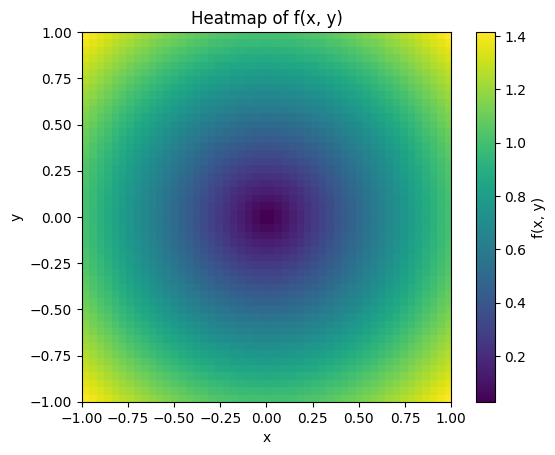

In [57]:
import matplotlib.pyplot as plt

plt.imshow(X, extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heatmap of f(x, y)')
plt.show()

[2.42263297e+02 3.34964173e+01 1.22916215e+01 3.20812734e+00
 8.78236044e-01 2.27677409e-01 5.34091884e-02 1.14585632e-02
 2.56296020e-03 7.54137717e-04]
[2.33597067e+02 1.82191026e+01 9.51733809e+00 2.11570823e-14
 2.11570823e-14 2.11570823e-14 2.11570823e-14 2.11570823e-14
 2.11570823e-14 2.11570823e-14]


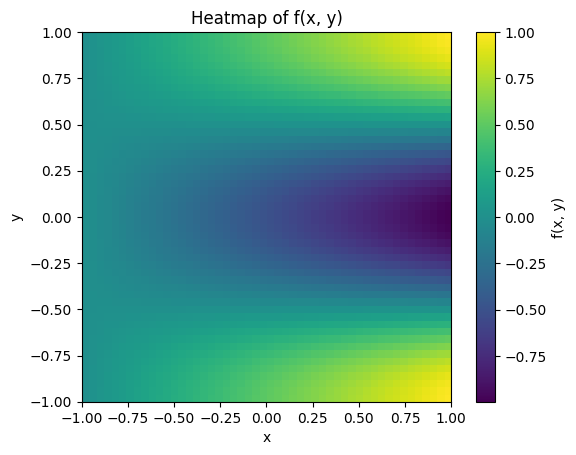

412.50000000000006


In [74]:

def circ(x, y):
    r, phi = polar(x, y)
    return r**2 + phi**2

def polar_inv(r, phi):
    x = r * np.sin(phi)
    y = r * np.cos(phi)
    return x, y

x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)

A = circ(X, Y)
U, s, V = np.linalg.svd(A)
print(s[:10])

r = np.linspace(0, 1, 50)
phi = np.linspace(0, 2*np.pi, 50)
R, Phi = np.meshgrid(r, phi)
X, Y = polar_inv(R, Phi)
A = circ(X, Y)
U, s, V = np.linalg.svd(A)
print(s[:10])


import matplotlib.pyplot as plt

plt.imshow(Y, extent=(-1, 1, -1, 1), origin='lower', cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heatmap of f(x, y)')
plt.show()
print(np.trace(X @ X.T))